# Exploring the spatial distributions of GCs in Abell 2744

* Photometric catalogue of GCs from Harris & Reina-Campos 2023
  - select GCs by quality zone, colour, ...


In [1]:
# Import modules
import numpy, os, glob, scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
from astropy import constants as c
from astropy.table import Table
from matplotlib.colors import LogNorm, SymLogNorm, Normalize
from astropy.visualization.wcsaxes import add_scalebar
from astropy.coordinates import SkyCoord
import numpy.ma as ma

# sys.path.append("/Users/mreina/Documents/Science/000-Projects/git-repos/git_shapes_gcs_dm/")
# from functions_shapes import create_gcs_image
import master_functions_abell2744 as mfgc
import master_functions_continuous as mfc
from master_class_galaxy_cluster import GalaxyCluster
from master_class_gcs import GCs
from master_class_lambdamaps import (
    LensingMap,
    StellarLightMap,
    XrayMap,
)

mpl.rcParams["text.usetex"] = False
mpl.rcParams["font.size"] = 18.0
mpl.rcParams["legend.fontsize"] = 16.0
mpl.rcParams["axes.linewidth"] = 1
mpl.rcParams["xtick.major.size"] = 10
mpl.rcParams["xtick.minor.size"] = 5
mpl.rcParams["ytick.major.size"] = 10
mpl.rcParams["ytick.minor.size"] = 5
mpl.rcParams["savefig.dpi"] = 100

## Prepare general information and load the GC catalogue

In [2]:
# 1: create the instance of the Galaxy Cluster class for Abell 2744
# luminosity distance to Abell2744
distance_to_a2744 = 1630 * u.Mpc
# from Harris & Reina-Campos 2023
arcsec_kpc = (
    2100 * u.kpc / (460 * u.arcsec)
)  # conversion between arcsec and kpc at the distance of Abell 2744
# create the instance of the Galaxy Cluster class for Abell 2744
abell2744 = GalaxyCluster(
    "Abell2744", distance=distance_to_a2744, redshift=0.308, arcsec_to_kpc=arcsec_kpc
)

# create the output path
out_path = os.path.join(".", "imgs", "spatial_distributions")
if not os.path.exists(out_path):
    os.makedirs(out_path)

## Create the GC, LensingMap, StellarLightMap and XrayMap instances

### GC subsamples

In [3]:
number_of_pixels = [1024, 1024]  # size of the GC number density maps
sigma_kpc = (
    20 * u.kpc
)  # size of the Gaussian kernel to smooth the GC number density maps
# kernel size in arcsec
sigma_arcsec = sigma_kpc / abell2744.arcsec_to_kpc

### GC samples
# all GCs
bright_gcs = GCs("Bright GCs", "F150W$ < 29.5$", abell2744)
bright_gcs.wcs, bright_gcs.header = bright_gcs.create_wcs_and_header(
    numpy.ones(shape=number_of_pixels)
)
(
    bright_gcs.nrho_img,
    bright_gcs.nrho_smooth_img,
) = mfc.create_both_number_density_and_smoothed_maps_gcs(
    bright_gcs, number_of_pixels, sigma_arcsec
)

# blue GCs
blue_gcs = GCs("Bright Blue GCs", "F150W<29.5\n(F115W-F200W)$_0 < 0$", abell2744)
blue_gcs.wcs, blue_gcs.header = blue_gcs.create_wcs_and_header(
    numpy.ones(shape=number_of_pixels)
)
(
    blue_gcs.nrho_img,
    blue_gcs.nrho_smooth_img,
) = mfc.create_both_number_density_and_smoothed_maps_gcs(
    blue_gcs, number_of_pixels, sigma_arcsec
)

# red GCs
red_gcs = GCs("Bright Red GCs", "F150W<29.5\n(F115W-F200W)$_0 \geq 0$", abell2744)
red_gcs.wcs, red_gcs.header = red_gcs.create_wcs_and_header(
    numpy.ones(shape=number_of_pixels)
)
(
    red_gcs.nrho_img,
    red_gcs.nrho_smooth_img,
) = mfc.create_both_number_density_and_smoothed_maps_gcs(
    red_gcs, number_of_pixels, sigma_arcsec
)

# high-quality GCs
high_quality_gcs = GCs("High-quality GCs", "F150W<29.5\nZone 1 and 2", abell2744)
high_quality_gcs.wcs, high_quality_gcs.header = high_quality_gcs.create_wcs_and_header(
    numpy.ones(shape=number_of_pixels)
)
(
    high_quality_gcs.nrho_img,
    high_quality_gcs.nrho_smooth_img,
) = mfc.create_both_number_density_and_smoothed_maps_gcs(
    high_quality_gcs, number_of_pixels, sigma_arcsec
)

[GCs] Initialising the sample of GCs: Bright GCs
[create_number_density_gcs] Creating number density of GCs in 1024 x 1024 pixels
[GCs] Initialising the sample of GCs: Bright Blue GCs
[create_number_density_gcs] Creating number density of GCs in 1024 x 1024 pixels
[GCs] Initialising the sample of GCs: Bright Red GCs
[create_number_density_gcs] Creating number density of GCs in 1024 x 1024 pixels
[GCs] Initialising the sample of GCs: High-quality GCs
[create_number_density_gcs] Creating number density of GCs in 1024 x 1024 pixels


### Lambda Maps

In [4]:
###  Lensing models
p24_lambda = LensingMap("Price24", "lensing map")

# convert all the convergence maps to projected mass maps
for map in [p24_lambda]:
    map.convert_to_projected_mass(abell2744)

### Stellar light mosaics
mosaic_avg = StellarLightMap("Original", "stellar light")

### X-ray maps
map_xray = XrayMap("X-ray map", "xray map")

 [astropy.io.fits.verify]
Set MJD-END to 54262.041956 from DATE-END'. [astropy.wcs.wcs]


## LambdaMaps with GC contours

[3.64877441 3.50182284] [-30.44112939 -30.3144351 ]
[array([5.59339242e-11, 4.56395589e+03]), array([-3.95630195e-11,  4.56100003e+03])]
[array([  82.16518456, 1009.14731272]), array([ 147.1081569 , 1074.79423279])]


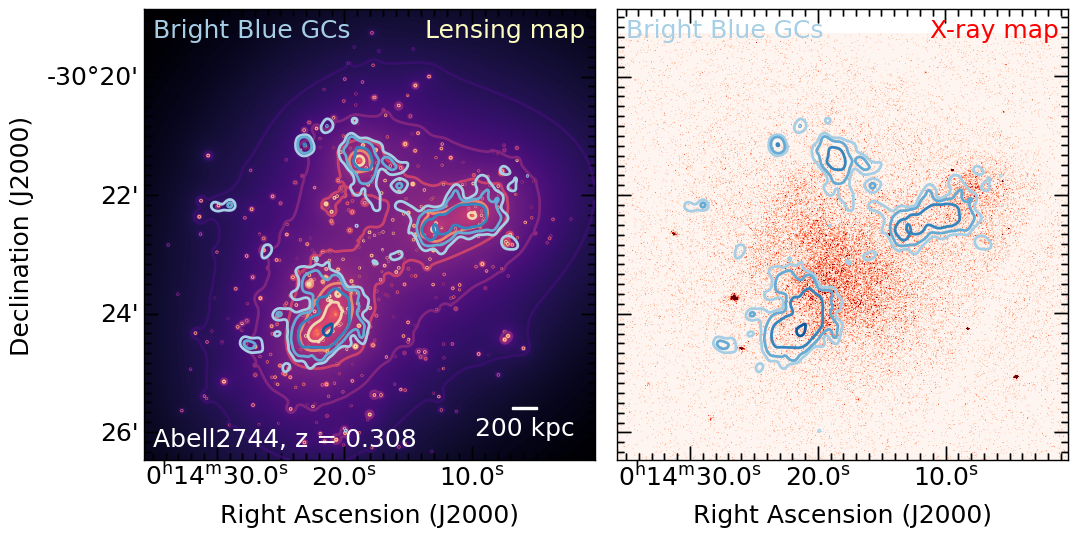

In [5]:
def figure_lensing_map_stellar_light_xray_with_gcs_contours(
    map_lensing, map_xray, gcs1, **kwargs
):
    def add_panel_lensing_map(ax, img, cmap, label="", lim_cbar=[0, 1]):
        cb = ax.imshow(
            img.T,
            origin="lower",
            cmap=cmap,
            norm=LogNorm(vmin=lim_cbar[0], vmax=lim_cbar[1]),
            zorder=0,
        )
        levels = [
            numpy.power(10, 8.3),
            numpy.power(10, 8.5),
            numpy.power(10, 8.7),
            numpy.power(10, 8.9),
            numpy.power(10, 9.1),
        ]
        colors = plt.get_cmap("magma")(numpy.linspace(0.2, 1, 5))
        ax.contour(img.T, levels=levels, colors=colors, alpha=0.8, linewidths=2)
        ax.annotate(
            "Lensing map",
            xy=(0.98, 0.98),
            ha="right",
            va="top",
            xycoords="axes fraction",
            color=colors[-1],
        )
        return cb

    def add_panel_xray_map(ax, img, cmap, label="", lim_cbar=[0, 1]):
        cb = ax.imshow(
            img.T,
            origin="lower",
            cmap=cmap,
            norm=Normalize(vmin=lim_cbar[0], vmax=lim_cbar[1]),
            zorder=0,
        )
        ax.annotate(
            "X-ray map",
            xy=(0.98, 0.98),
            ha="right",
            va="top",
            xycoords="axes fraction",
            color="red",
        )
        return cb

    def add_gcs_to_panel(ax, sample, cmap, colors, label="", **kwargs):
        levels = [
            numpy.power(10, -1.4),
            numpy.power(10, -1.2),
            numpy.power(10, -0.9),
            numpy.power(10, -0.4),
        ]
        contours = ax.contour(
            sample.nrho_smooth_img.value,
            levels=levels,
            colors=colors,
            transform=ax.get_transform(sample.wcs),
            linewidths=2,
        )
        ax.annotate(
            "Bright Blue GCs",
            xy=(0.02, 0.98),
            ha="left",
            va="top",
            xycoords="axes fraction",
            color=colors[0],
        )

    fig = plt.figure(figsize=(12, 6.5))

    left = 0.1
    right = 0.87
    top = 0.98
    bottom = 0.1
    hspace = 0.0
    wspace = 0.05

    axs = []

    # lensing map
    ax = fig.add_subplot(121, projection=map_lensing.wcs)
    cb = add_panel_lensing_map(
        ax, map_lensing.img_mass.value, "magma", label="Price24", lim_cbar=[1e8, 1e10]
    )
    axs.append(ax)

    # x-ray map
    ax = fig.add_subplot(122, projection=map_xray.wcs)
    cb = add_panel_xray_map(ax, map_xray.img, "Reds", label="X-ray", lim_cbar=[0, 1])
    axs.append(ax)

    # add the contours of the bright GCs sample
    for ax in axs:
        add_gcs_to_panel(
            ax,
            gcs1,
            "Blues",
            plt.get_cmap("Blues")(numpy.linspace(0.35, 1, 5)),
            **kwargs
        )

    # Compute the angle corresponding to 10 pc at the distance of the galactic center
    scalebar_length = 200 * u.kpc
    scalebar_angle = (scalebar_length / distance_to_a2744).to(
        u.deg, equivalencies=u.dimensionless_angles()
    )
    # Add a scale bar
    add_scalebar(
        axs[0], scalebar_angle, label="200 kpc", color="white", size_vertical=20
    )

    # Add the name of the cluster
    axs[0].annotate(
        "Abell2744, z = 0.308",
        xy=(0.02, 0.02),
        ha="left",
        va="bottom",
        xycoords="axes fraction",
        color="white",
    )

    # find the limits of the image for the bright GCs sample in (RA, DEC)
    p24_xlim_ra = numpy.asarray(
        map_lensing.wcs.all_pix2world([0, map_lensing.img.shape[0]], [0, 0], 0)
    )[0]
    p24_ylim_dec = numpy.asarray(
        map_lensing.wcs.all_pix2world([0, 0], [0, map_lensing.img.shape[1]], 0)
    )[1]
    print(p24_xlim_ra, p24_ylim_dec)
    # format all axes
    for j, ax, sample in zip(range(10), axs, [map_lensing, map_xray]):
        ra = ax.coords[0]
        dec = ax.coords[1]
        if j % 3 == 0:
            dec.set_axislabel("Declination (J2000)")
        else:
            dec.set_ticks_visible(True)
            dec.set_ticklabel_visible(False)
            dec.set_axislabel("")

        ra.set_axislabel("Right Ascension (J2000)")

        # set the formatting of the axes
        ra.set_major_formatter("hh:mm:ss.s")
        dec.set_major_formatter("dd:mm")
        # display minor ticks
        ra.display_minor_ticks(True)
        dec.display_minor_ticks(True)
        ra.set_minor_frequency(10)
        dec.set_minor_frequency(12)
        ra.tick_params(
            which="major", direction="in", top=True, bottom=True, length=10, width=1
        )
        dec.tick_params(
            which="major", direction="in", right=True, left=True, length=10, width=1
        )
        ra.tick_params(which="minor", length=5)
        dec.tick_params(which="minor", length=5)

        # for each sample, covert the edges in (RA,DEC) to pixels and apply those limits to the panel
        lim_pix = sample.wcs.all_world2pix(p24_xlim_ra, p24_ylim_dec, 0)
        print(lim_pix)
        ax.set_xlim(lim_pix[0])
        ax.set_ylim(lim_pix[1])

    # format the entire figure
    fig.subplots_adjust(
        left=left, top=top, bottom=bottom, right=right, hspace=hspace, wspace=wspace
    )
    fig.savefig(
        os.path.join(out_path, "xy_price24_xray_with_gcs_all_simple.pdf"),
        bbox_inches="tight",
    )
    plt.show()


figure_lensing_map_stellar_light_xray_with_gcs_contours(p24_lambda, map_xray, blue_gcs)